<a href="https://colab.research.google.com/github/NoorMemonzz/Dynamic-Email-Generator-Python/blob/main/Another_copy_of_Topic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the dataset

from google.colab import files
import pandas as pd

# Upload the file from your local machine
uploaded = files.upload()

# Assuming the file is named 'input_updated.csv'
df = pd.read_csv('cleaned_ai_responses_tone.csv')
print(df.head())

Saving cleaned_ai_responses_tone.csv to cleaned_ai_responses_tone.csv
                                         AI Response      Source  \
0  university admissions are open apply now and s...  ChatGPT 4o   
1  ready to take the next step university admissi...  ChatGPT 4o   
2  its time university admissions are open apply ...  ChatGPT 4o   
3  the wait is over apply now for university admi...  ChatGPT 4o   
4  university admissions are open take the next s...  ChatGPT 4o   

            tone language                                Cleaned AI Response  
0   Motivational       en  university admissions are open apply now and s...  
1    Encouraging       en  ready to take the next step university admissi...  
2         Urgent       en  its time university admissions are open apply ...  
3  Inspirational       en  the wait is over apply now for university admi...  
4       Exciting       en  university admissions are open take the next s...  


In [ ]:
#data was already cleaned
df = pd.read_csv('cleaned_ai_responses_tone.csv')

#So vectorize the data
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the cleaned text using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust the number of features
X = vectorizer.fit_transform(df['Cleaned AI Response'])

# Check the shape of the transformed data
X.shape

(3559, 1000)

In [ ]:
#Build the LDA Model -----
df = pd.read_csv('cleaned_ai_responses_tone.csv')

from sklearn.decomposition import LatentDirichletAllocation

# Build the LDA model
lda = LatentDirichletAllocation(n_components=50, random_state=42)  # Set the number of topics
lda.fit(X)

# Display the topics
import numpy as np

# Function to display the top words in each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

# Display top 20 words for each topic
display_topics(lda, vectorizer.get_feature_names_out(), 20)

Topic #1:
calling toward answer futures is future it your first step now the universityadmissions applynow take soar university admissions open apply

Topic #2:
more learn open admissions university are futurestudents admissionsopen learnmore your today ready begin now universityadmissions future to journey applications about

Topic #3:
await hey energy the there to of door grads for feel provide higher future launch your open applynow education embrace

Topic #4:
leap best the yet take come finances is bound to open applynow university admissions futurelearn now universityadmissions welcomes learnmore thrives

Topic #5:
time its to open admissions applynow is apply openenroll university yes are now your unique universityadmissions today the say in

Topic #6:
affordable message can make scholarship guidance succeed help planning expert you scholarships our us fundingavailable applytoday collegebound pursue college inquirenow

Topic #7:
campus community dynamic explorecampus our possibi

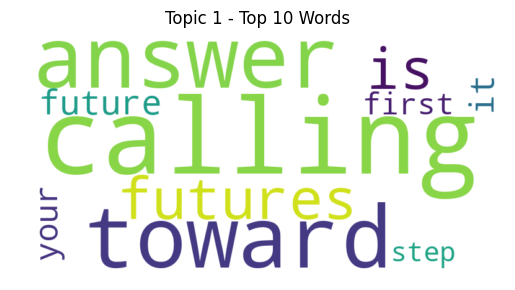

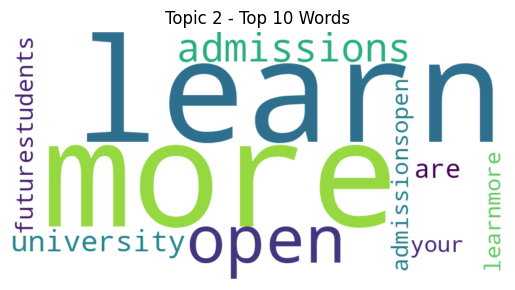

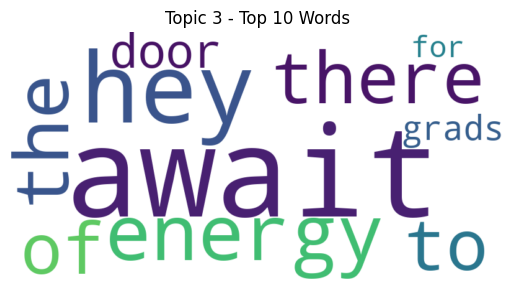

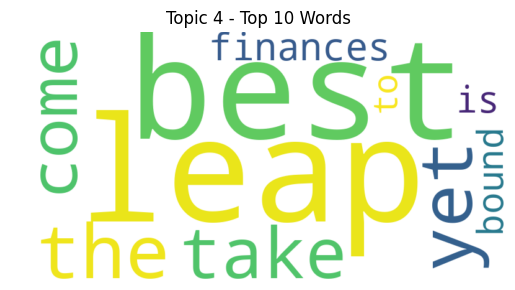

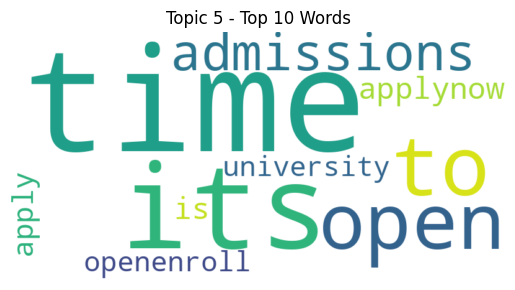

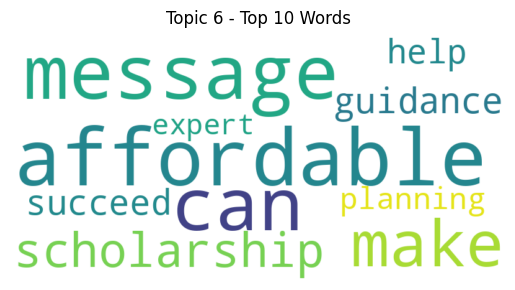

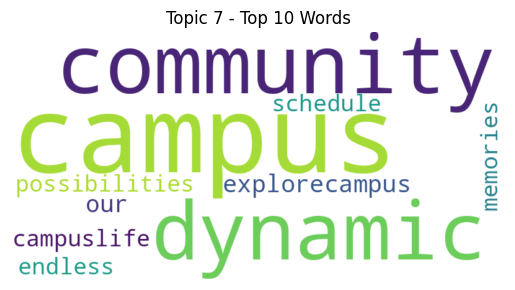

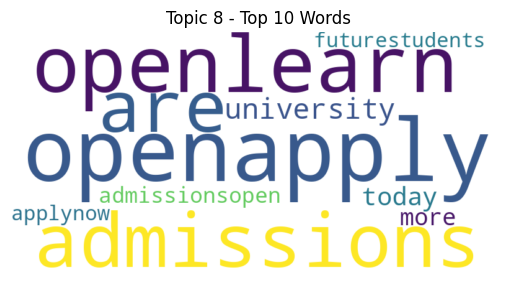

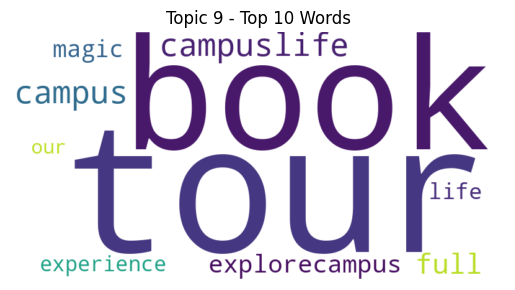

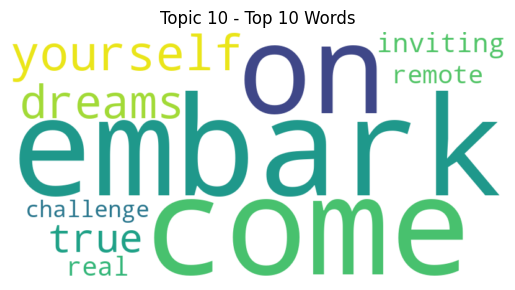

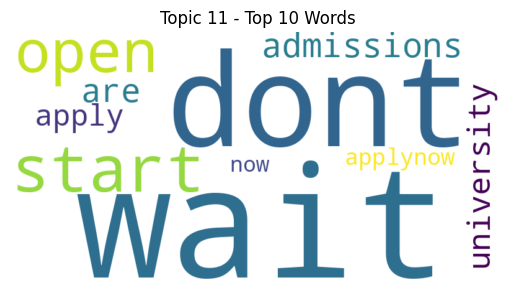

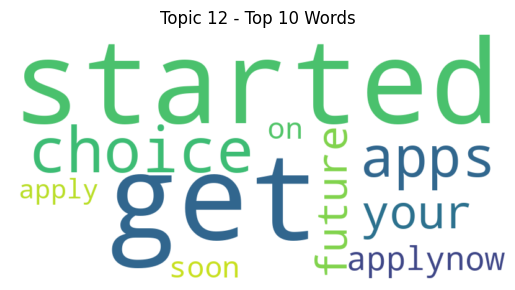

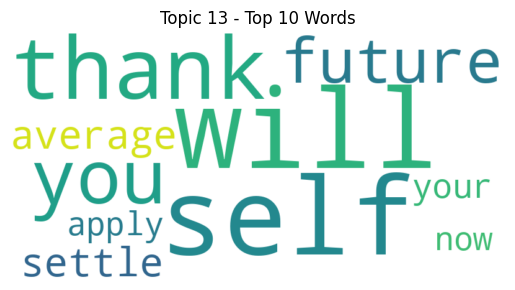

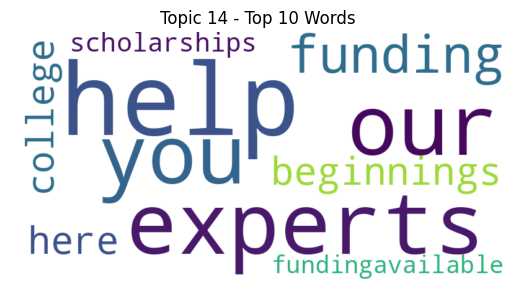

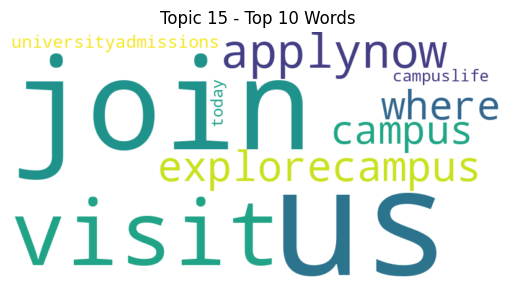

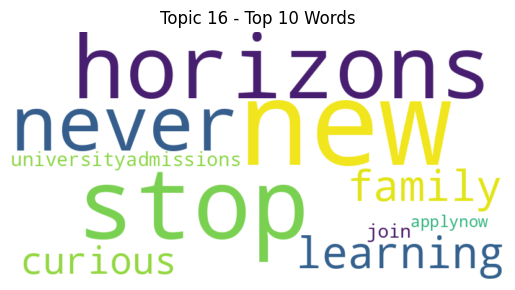

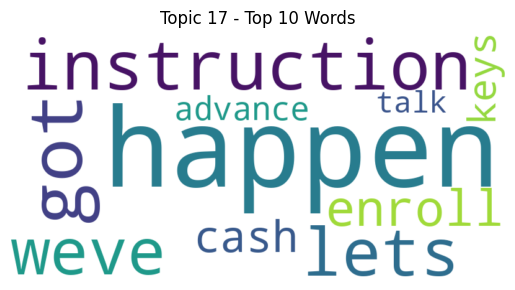

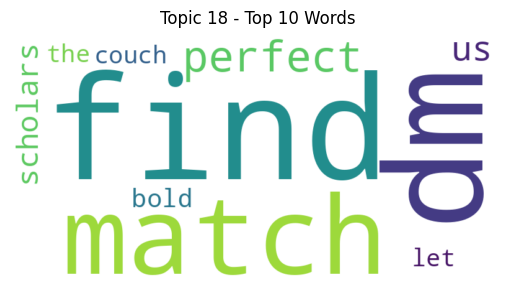

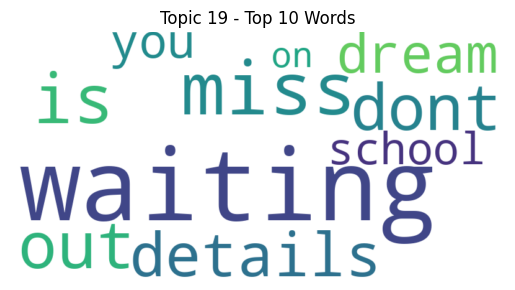

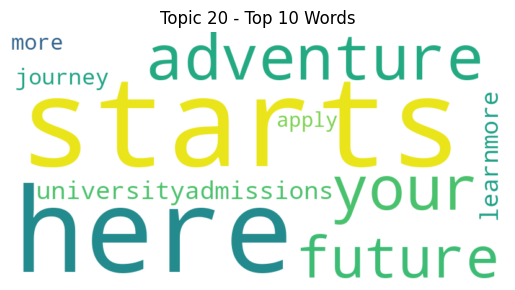

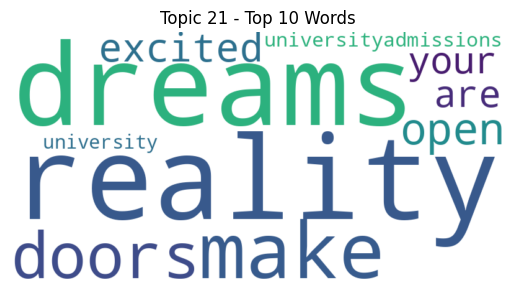

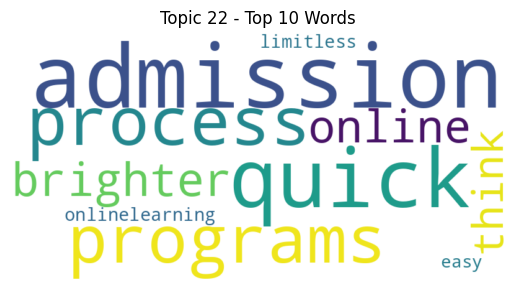

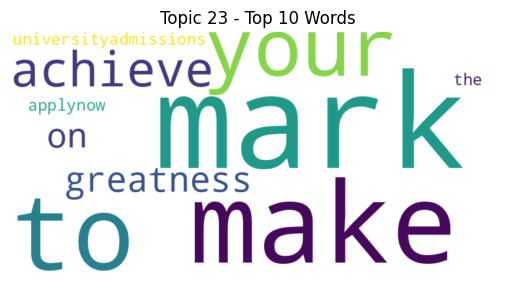

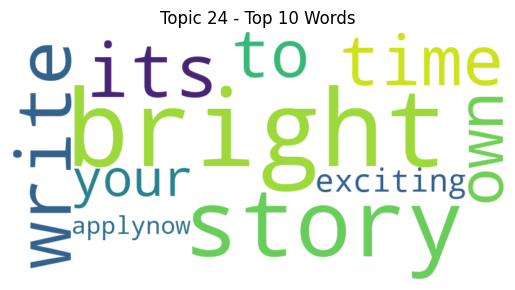

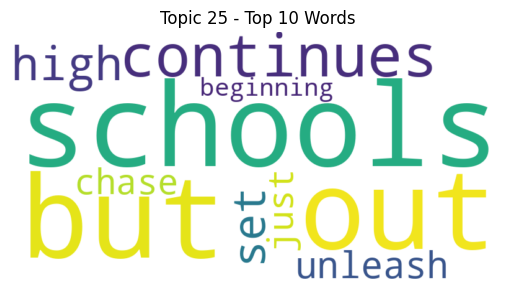

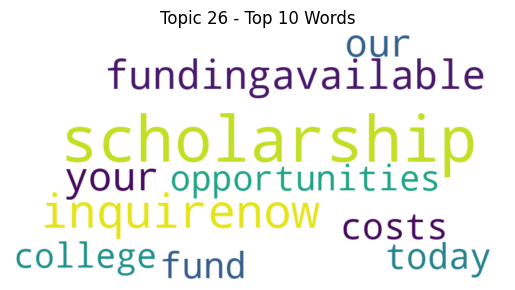

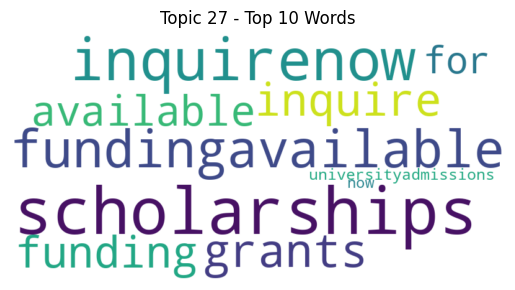

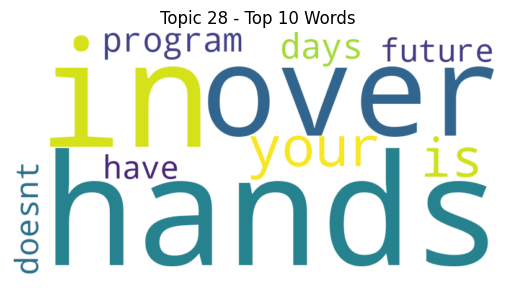

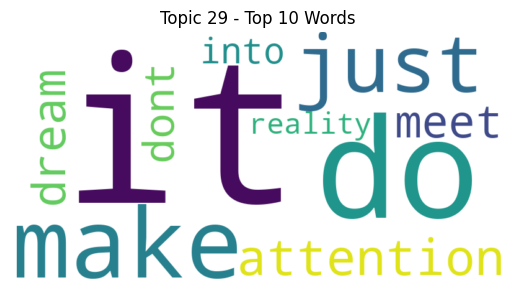

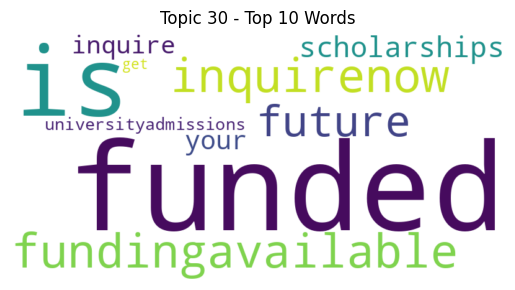

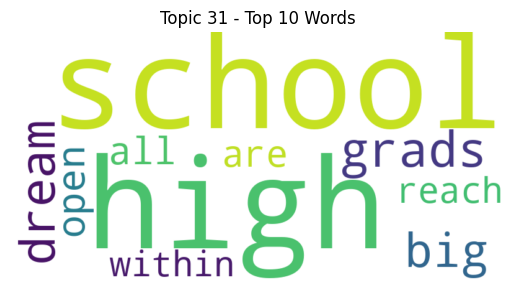

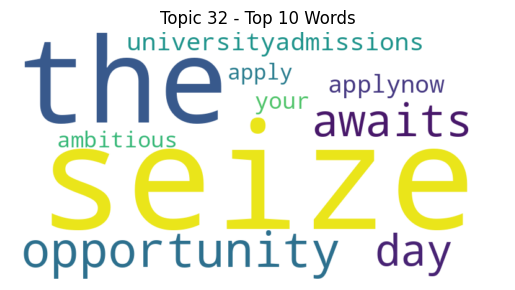

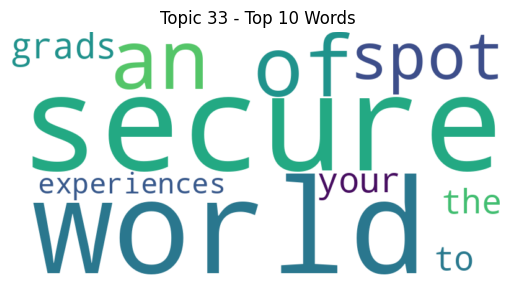

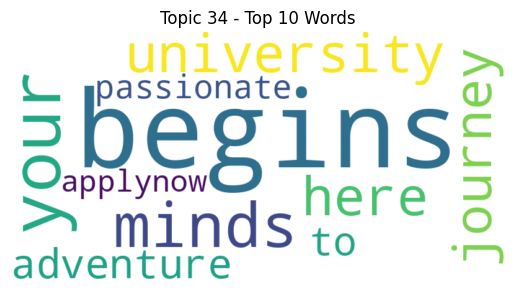

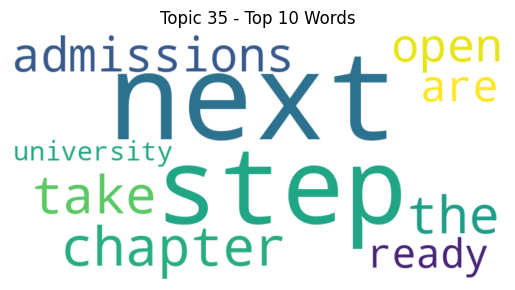

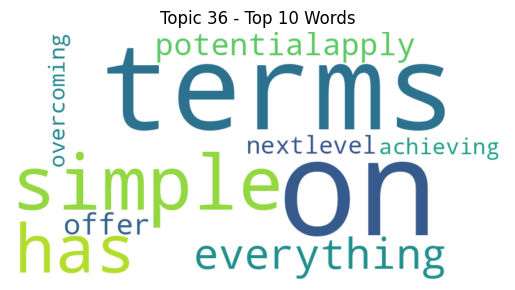

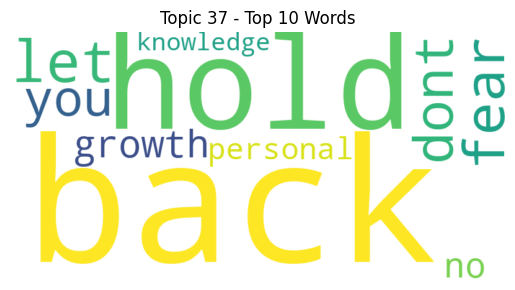

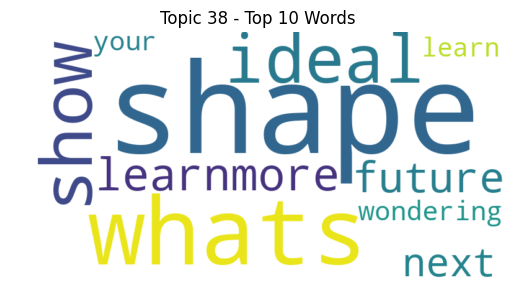

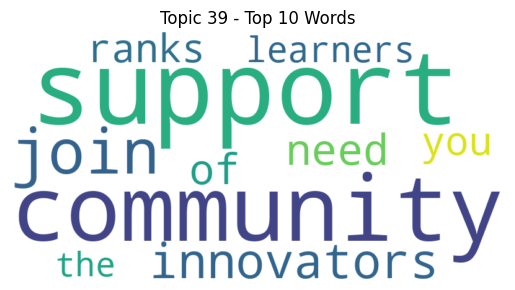

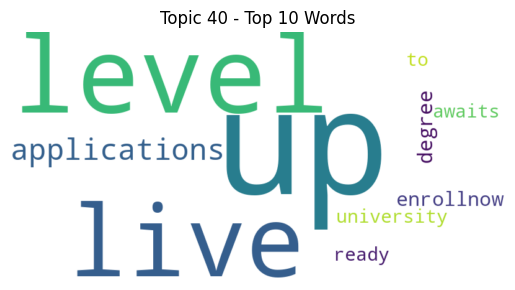

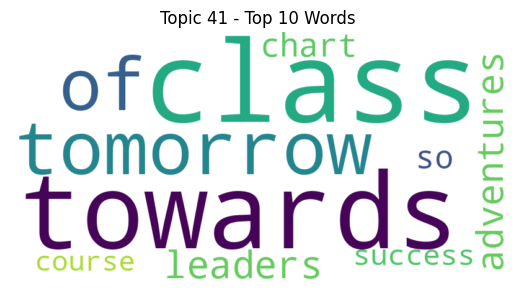

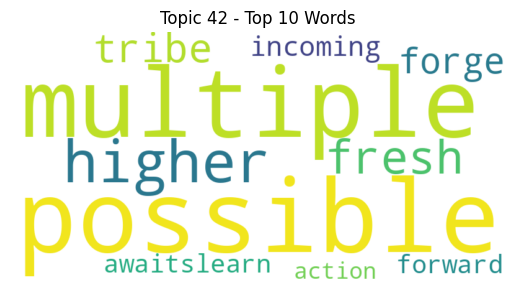

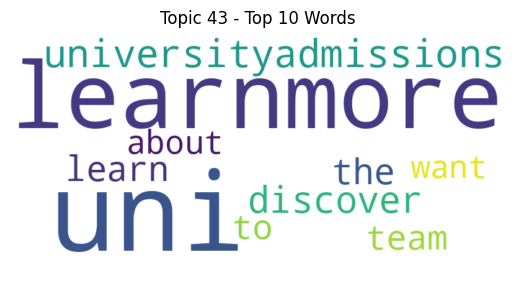

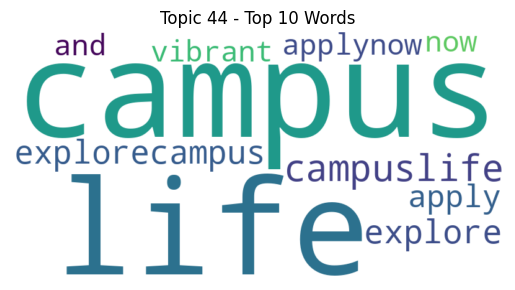

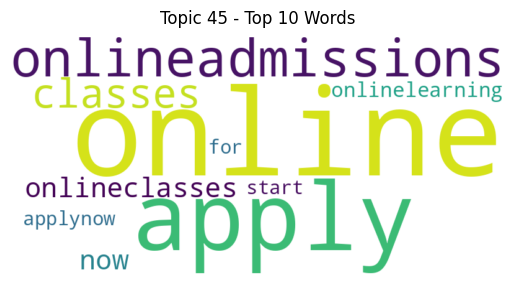

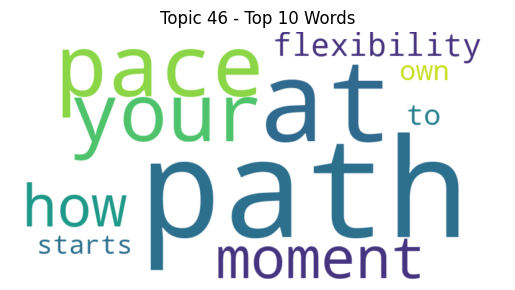

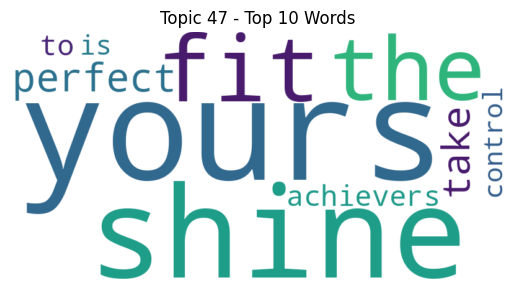

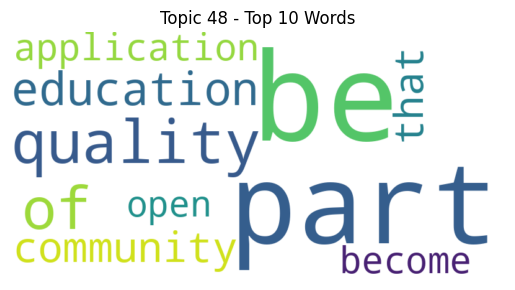

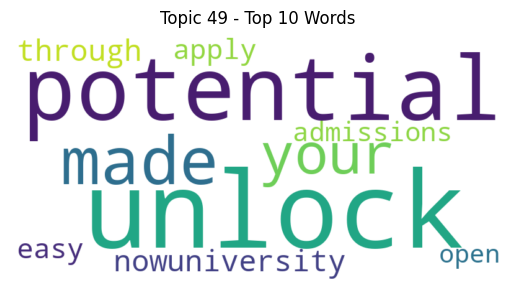

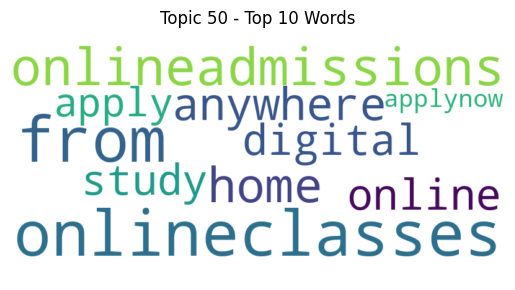

In [ ]:
#Visualization through Wordcloud

# Import necessary libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the top words for each topic
n_words = 10
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-n_words - 1:-1]
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_idx]
    top_weights = topic[top_words_idx]

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(top_words, top_weights)))

    # Display the word cloud
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx + 1} - Top {n_words} Words')
    plt.axis('off')  # Hide axes for a cleaner look
    plt.show()  # Show the plot

In [ ]:
#These are top 20 words in top topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install gensim nltk

In [ ]:
!pip install gensim spacy

In [ ]:
#Question -- which topic is likely to resonate most with students?

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if you haven't already
nltk.download('stopwords')

# Sample corpus (a list of documents, where each document is a list of words)
texts = [
    ['scholarships', 'funding', 'available', 'apply', 'now'],
    ['university', 'admissions', 'open', 'learn', 'more'],
    ['campus', 'life', 'explore', 'vibrant', 'community'],
    ['online', 'classes', 'apply', 'onlineadmissions', 'now']
]

# Preprocessing step: Remove stopwords (optional)
stop_words = set(stopwords.words('english'))
texts = [[word for word in doc if word not in stop_words] for doc in texts]

# Create a dictionary from the processed texts
dictionary = corpora.Dictionary(texts)

# Create a corpus: List of bag-of-words vectors (each document is a vector)
corpus = [dictionary.doc2bow(text) for text in texts]

# Create an LDA model (number of topics = 2 for example)
lda_gensim = LdaModel(corpus, num_topics=2, id2word=dictionary, passes=15)

# Calculate coherence score
coherence_model = CoherenceModel(model=lda_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Print coherence score
print(f'Coherence Score: {coherence_score}')

Coherence Score: 0.43446421892622533


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Interpretation
#coherence score is: 0.4344642189262252
#INterpreation is explained in the wrod doc file n google drive


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Checking coherence for each AI Tool
import pandas as pd
df = pd.read_csv('cleaned_ai_responses_tone.csv')

from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Define function to preprocess text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

# Apply preprocessing to each AI tool's content
df['cleaned_text'] = df['Cleaned AI Response'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Function to perform LDA and calculate coherence for a subset of the dataset
def get_topic_coherence(df_subset):
    # Vectorize the cleaned text
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(df_subset['cleaned_text'])

    # Apply LDA
    lda = LatentDirichletAllocation(n_components=50, random_state=42)  # Set number of topics
    lda.fit(X)

    # Calculate topic coherence (use your own method for this)
    # In this case, we can use the CoherenceModel from Gensim or sklearn's metric
    # For simplicity, we just return the top 50 topics' words
    topics = lda.components_
    feature_names = vectorizer.get_feature_names_out()

    # Extracting top words for each topic
    top_words = []
    for topic in topics:
        top_words.append([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])

    return top_words

# Apply to each AI tool's content
ai_tools = df['Source'].unique()
ai_tool_coherence = {}

for tool in ai_tools:
    df_tool = df[df['Source'] == tool]
    top_words = get_topic_coherence(df_tool)
    ai_tool_coherence[tool] = top_words

# Now you have top words per AI tool
print(ai_tool_coherence)

{'ChatGPT 4o': [['world', 'exciting', 'ahead', 'easier', 'possibilities', 'got', 'nowapply', 'connections', 'explore', 'experience'], ['life', 'campus', 'apply', 'applynow', 'campuslife', 'university', 'explore', 'vibrant', 'explorecampus', 'universityadmissions'], ['admissions', 'university', 'openlearn', 'universityadmissions', 'applynow', 'today', 'starts', 'admissionsopen', 'future', 'apply'], ['adventure', 'begins', 'college', 'apply', 'flexible', 'exploring', 'experience', 'experiences', 'exploration', 'explore'], ['explore', 'secure', 'options', 'college', 'waitapply', 'details', 'grant', 'scholarship', 'unlock', 'started'], ['scholarships', 'universityadmissions', 'fundingavailable', 'inquirenow', 'grants', 'inquire', 'funding', 'university', 'available', 'apply'], ['online', 'apply', 'classes', 'study', 'onlineclasses', 'applynow', 'futurecreate', 'journey', 'financial', 'experiences'], ['campus', 'life', 'apply', 'applynow', 'campuslife', 'universityadmissions', 'explorecampu

In [ ]:
#Calculating coherence score for each AI Tool

from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel

# Convert data into Gensim format
def get_gensim_data(df_subset):
    texts = [text.split() for text in df_subset['cleaned_text']]
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    return texts, dictionary, corpus

# Function to calculate coherence score
def calculate_coherence(df_subset):
    texts, dictionary, corpus = get_gensim_data(df_subset)

    # Train the LDA model
    lda_gensim = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

    # Calculate the coherence score
    coherence_model = CoherenceModel(model=lda_gensim, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    return coherence_score

# Apply to each AI tool's content
ai_tool_scores = {}

for tool in ai_tools:
    df_tool = df[df['Source'] == tool]
    coherence_score = calculate_coherence(df_tool)
    ai_tool_scores[tool] = coherence_score

# Print out the coherence scores for each AI tool
print(ai_tool_scores)

{'ChatGPT 4o': 0.36469570169604254, 'Gemini': 0.3839144489199401, 'Claude': 0.43831154001951916, 'Jasper': 0.32225301422603614, 'Pi': 0.4607641542107519}
